# WEEK 05 - Algorithms I

## Learning Objectives

- Getting started with the fundamental concepts in algorithms, e.g., formulation and analysis in terms of computational complexity
- Getting familiar with different sorting algorithms
- Getting started with algorithm analysis
- Conducting empirical measurements in order to quantify code performance
- Consolidating the concepts of procedural programming

## All sorts of sorts
In this tutorial, we are going to learn about algorithms and their properties in the context of one of the most basic but, at the same time, useful algorithms, namely sorting. The problem of sorting, i.e., arranging a number of items in either ascending or descending order comes up in various settings and is, therefore, of great importance. On the other hand, it is simple enough to illustrate several fundamental concepts in algorithms.

We are going to start by formally defining the task. Given items $x_{i}, i = 1, 2, \dots, n$, where comparative operators such as $x_{i} < x_{j}$ are defined, we would like to arrange the items either in ascending order such that $x_{i} < x_{j}, \forall \quad i,j = 1, 2, \dots, n \quad i < j$ or descending order such that $x_{i} > x_{j}, \forall \quad i,j = 1, 2, \dots, n \quad i < j$.

For the purpose of this tutorial, we are going to make some simplifying assumptions without loss of generality. First, we are going to assume that an ascending order is desired, noting that a descending order virtually makes no difference to the presented algorithms. Furthermore, we are going to assume that the data is stored in arrays (Python lists).

Before reading on, try and come up with an algorithm for the task.

## Naive (selection) sort
The simplest algorithm for the job and, arguably, the most intuitive is **selection sort**, which can be summarized as the following steps, starting from a list of unsorted items and an empty list of sorted items:

1. Go through the list of items and find the smallest item
2. Add it to the end of the sorted array
3. Remove the item from the original array
4. Repeat step one

Your task is to implement the selection sort algorithm, given an array of items.

Before we get started, make sure that you run the cell below.

In [1]:
%matplotlib inline

In [ ]:
"""
Your task is to implement the selection sort algorithms for arrays.
""";

def find_minimum(x):
    """
    Finding the minimum function
    """
    m = x[0]
    i_min = 0
    for i in range(len(x)):
        if (x[i] < m):
            m = x[i]
            i_min = i
            
    return m, i_min
## Edit
def selection_sort(original):
    # Sorted array
    sorted = []
    # Code here
    #for i in range(len(sorted)):
        #if original[i] >= original[i+1]:
        #    i = i + 1
        #elif original[i] < original[i+1]:
        #    sorted.append(original[i])
    # Lecture
    n = len(original)
    for i in range(n):
        #m = min(original)
        m, i = find_minimum(original)
        sorted.append(m)
        #original.remove(m) # Remember this .remove, .append command!!! #
        original.pop(i) 
    # Return sorted array
    return sorted

Now, initialize an array with a given size $n$ with random integers $\{i | i \in \mathbb{Z}^{+}_{0} \land n < 2n \}$ and sort it using the selection sort algorithm.

In [27]:
from random import randrange

# Number of items
n = 10
# Initialize the original item array
original = []
for i in range(n):
    original.append(randrange(n))
print(f"My original array: {original}")
# Sort using selection sort
sorted_new = selection_sort(original)
# Print out the sorted array
print(f"My sorted array: {sorted_new}")

## Linear complexity means double the problem size, and the double the time is required.
## 

My original array: [9, 0, 0, 9, 3, 6, 4, 2, 3, 7]
My sorted array: [0, 0, 2, 3, 3, 4, 6, 7, 9, 9]


We are going to need a way to validate our implementations moving onward, and, in order to avoid the chicken and egg problem of validating the validation function, I am going to provide below a function that returns `True` if a passed array is sorted, which should act as ground truth for the rest of this tutorial.

In [28]:
def is_sorted(v):
    for i in range(0, len(v)):
        for j in range(i, len(v)):
            if (v[j] < v[i]):
                return False

    return True

Go ahead and check if your array is indeed sorted. Initialize a few different arrays at random to make sure you are not just getting lucky.

In [31]:
# Code here
n = 10
# Initialize the original item array
original = []
for i in range(n):
    original.append(randrange(n))
print(f"My original array: {original}")
# Sort using selection sort
sorted_new = is_sorted(original)
# Print out the sorted array
print(f"My sorted array: {sorted_new}")

My original array: [9, 9, 9, 0, 4, 1, 4, 9, 1, 7]
My sorted array: False


If you received a validation, congratulations! If not, go back and fix the issue.

## Analysis
It is often desired to know beforehand how an algorithm behaves for a given problem. This could be about whether it can find the optimal solution, or any solution. It could likewise be about how many operations are required to arrive at a solution, or the time it takes for said operations to complete. In this tutorial, we are going to limit ourselves to the latter, and in particular, the runtime of the algorithms. This brings us neatly to the concept of algorithmic complexity.

### Algorithmic complexity
In complexity analysis, we are mainly concerned with the required **amount of work as a function of problem size**. For our sorting algorithm above, this translates to the number of operations for a given array size. To make things simpler, try to think of the number of operations roughly as the number of times you need to *visit* a given element.

Here, we are going to concern ourselves with the **Big O** notation in particular, in which the complexity of an algorithm is represented as $O(f(n))$, where $f(n)$ is a function and $n$ is the problem size. For instance, the dot product of two vectors $\mathbf{v}$ and $\mathbf{w}$ are said to have a complexity of $O(n)$, where $n$ is the size of the vectors. Try and convince yourself that if the size of the vectors doubled, i.e., $n \to 2n$, then the number of operations you needed for computing the dot product would likewise double.

The complexity of the dot product operation is therefore linear, i.e., linearly depends on the problem size.

The question to you is: what is the complexity of the selection sort algorithm?

Now it may be somewhat more intricate to come up with the function $f(n)$ for the selection sort, although it is still doable intuitively. Nevertheless, we can try and measure the behavior of the algorithm. In particular, we could measure the runtime of selection sort for different array sizes. This should give us a glimpse into the complexity of the algorithm.

I have prepared a function that plots the runtime vs the problem size for a given number of data series. It is your job to do the measurement! It furthermore acts as an educational instrument to illustrate the usage of third-party code. In this case, you need to figure out how to use the function `plot_runtime` using its documentation.

In [17]:
import matplotlib.pyplot as plt

def plot_runtime(data):
    """
    Plots the runtime vs problem size of a given number of measurements.
    data is an array of tuples (n, t, label) where
        - n is the array of problem sizes
        - t is the array of runtime measurements in seconds
        - label is the data label
    It is recommended to set the label to the name of the method, e.g., "selection sor"
    
    In other words, data is
    [(n0, t0, label0), (n1, t1, label1), ...] where
    n0, n1, ... are arrays representing the problem sizes of each series,
    t0, t1, ... are arrays representing the runtime measurements of each series and
    label0, label1, ... are the labels of each series.

    It is therefore  possible to use this function to plot multiple data series at once.
    """
    
    fig, ax = plt.subplots(figsize=(5,3.5))
    # Logarithmic axes
    for p in data:
        ax.loglog(p[0], p[1], label = p[2])
    ax.set_xlabel(r"Problem size $n$ [-]", fontsize = 8)
    ax.set_ylabel(r"Runtime $t$ [s]", fontsize = 8)
    ax.legend(fontsize = 8)
    plt.tight_layout()


n0 = [1, 10, 200]
t0 = [2, 20, 200]
label0 = "my algorithm"

n = [1, 10, 200]
t = [2, 20, 200]
label = "my algorithm"

data = [(n, t, label), (n0, t0, label0)]

plot_runtime(data)

Your task is to measure the runtime of the selection sort algorithm for different problem sizes and plot it using the function above.

**Hint**:

- All the important characteristics of the algorithm in terms of its complexity can be extracted using a few, well-chosen points
- Note that the problem size must be large enough in order to provide meaningful measurements. Start from a minimum problem size of roughly 100
- Note that it is common practice to plot runtime vs problem size with logarithmic axes, as is done in the function above. To freshen up your intuitiion of such graphs, remember that polynomial functions of a given power turn into linear functions whose slope is proportional to the polynomical power
- In order to get the most out of the graph, it may be a good idea to plot a couple of these polynomials along with the actual time measurements, which can be done easily by generating time series that follow such polynomials
- The task can be summarized as choosing a few problem sizes, measuring the runtime of the selection sort algorithm for these data points and plotting them together using the function above

[128, 256, 512, 1024, 2048, 4096, 8192]
[0.0002415180206298828, 0.0010762214660644531, 0.005540609359741211, 0.02448415756225586, 0.07358622550964355, 0.31366562843322754, 1.3253262042999268]


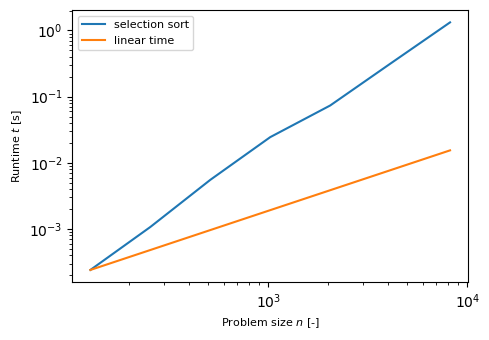

In [40]:
import time

# time.time() returns the current time in seconds
# The following structure can be used to measure the
# runtime of a given operation

# start = time.time()
# operation...
# runtime = time.time() - start

# Problem size
n = 
# Runtime
t = 

for size in n:
    # Initialize the original item array
    original = 
    # Start time
    
    # Sort using selection sort
    
    # Compute runtime
    

# Prepare the data for the plot function
data = 

# Plot measurements


You have hopefully seen how the selection sort algorithm behaves in terms of computational complexity. Try to answer the following questions for yourself:

- What happens to the runtime when the problem size is doubled?
- How can the computational complexity of the selection algorithm be described as a function of $n$?
- You may have also noticed that the runtime becomes unwieldy at some point. What was the largest problem size that you could solve in a reasonable time?

The real question is **can we do better?**

## Quick sort
We now turn our attention to another sorting algorithm that seeks to improve on the performance of the selection sort algorithm.

Quick sort is based on the concept of [divide and conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm), where the solution to the target problem is obtained using the solution to smaller problems, and is tightly connected to [recursion](https://en.wikipedia.org/wiki/Recursion_(computer_science)), which you should already be familiar with from the previous weeks.

Divide and conquer algorithms are characterized by a base case—a problem that cannot be broken down any further—and the process of (recursively) computing the solution to the large problem using a series of smaller problems.

Let us build quick sort bottom up. It is arguably intuitive to see that the simplest arrays to sort are the empty array (size 0) and the single-element array (size 1), both of which require no operation for sorting.

For all other cases, i.e., array sizes > 1, we are going to do the following:

- Choose one element at random as the **pivot**. Here, for simplicity, we are going to always choose the first element as the pivot
- Divide the array $\mathbf{x}$ into the following form: $\mathbf{l} + x_{p} + \mathbf{u}$, where $x_{p}$ is the pivot, $\mathbf{l}$ is the array consisting of all the elements $x_{i} <= x_{p}, \; \forall \; i = 0, 1, \dots, n \; i \ne p$, and $\mathbf{u}$ is the array consisting of all the elements $x_{i} > x_{p} \; \forall \; i = 0, 1, \dots, n, \; i \ne p$.

Note that if $\mathbf{l}$ and $\mathbf{u}$ are sorted, we are done. Try to convince yourself that in this case $\mathbf{l} + x_{p} + \mathbf{u}$ is a sorted array.

However, since they are not sorted in the general case, we need to sort them first. Do we know how to do that? Well, the quick sort algorithm is supposed to do just that so why not try and sort $\mathbf{l}$ and $\mathbf{u}$ using quick sort?

The question is if it would work. To prove this, we are going to take an inductive path. Let us start with an array of size 2:

$\mathbf{x} = [5, 7]$.

Choosing the first element (5) as pivot would lead to the following decomposition:

$\mathbf{x} = \underbrace{[\;]}_{\mathbf{l}} + \underbrace{[5]}_{x_{p}} + \underbrace{[7]}_{\mathbf{u}}$.

Our quick sort algorithm is capable of sorting both $\mathbf{l}$ and $\mathbf{u}$ as they fall into the base cases. Convince yourself that given **any** array of size 2 and **any** pivot, $\mathbf{l}$ and $\mathbf{u}$ will be arrays of size < 2, and therefore, a base case.

Now let us see how this would look like for arrays of size 3. Let

$\mathbf{x} = [5, 7, 20]$.

Choosing the first element (5) as pivot leads to the following decomposition:

$\mathbf{x} = \underbrace{[\;]}_{\mathbf{l}} + \underbrace{[5]}_{x_{p}} + \underbrace{[7, 20]}_{\mathbf{u}}$.

Can we sort $\mathbf{l}$ and $\mathbf{u}$ using quick sort? Convince yourself that these arrays are of size < 3, which are either a base case or an array of size 2, which we saw how to sort using quick sort above.

By this point, you may have already anticipated where we are going. For an array of size 4, arrays $\mathbf{l}$ and $\mathbf{u}$ would be of size < 4 after decomposition, for all of whose cases we have seen how quick sort works. And we can continue this line of argument for any array of size $n$. This concludes our inductive proof.

Let us illustrate this. Imagine that you have the following array:

$\mathbf{x} = [5, 7, 20, 3, 10, 2]$

Choosing the first element (5) as the pivot leads to the following decomposition:

$\mathbf{x} = \underbrace{[3, 2]}_{\mathbf{l}} + \underbrace{[5]}_{x_{p}} + \underbrace{[7, 20, 10]}_{\mathbf{u}}$

We have seen that both the lower and upper arrays can be sorted using quick sort.

Your task is to implement the quick sort algorithm using the description above.

In [37]:
"""
Your task is to implement the quick sort algorithm as described above
"""

def quick_sort(original):
    # Code here

Now initialize an array with random integers as in the selection sort example and sort it using quick sort. Do not forget to validate your implementation using the `is_sorted` function.

In [38]:
# Number of items
n = 10
# Initialize the original item array
original =
# Sort using selection sort

# Print out the sorted array

# Validate implementation


The array sorted with the quick sort algorithm is indeed sorted: True


### Quick sort analysis
The analysis of the quick sort algorithm is comparatively more complicated than that of selection sort. Nevertheless, we can build some intuition for it. In order to figure out the computational complexity of quick sort, we need to answer the same question as for selection sort, namely for a given array of size $n$, how many times does quick sort need to loop over the elements? It is easy to see that for the decomposition of an array, each element has to be looped over once. This means that given an array $\mathbf{x}$ of size $n$, its decomposition into $\mathbf{x} = \mathbf{l} + x_{p} + \mathbf{u}$ is of complexity $O(n)$.

Therefore, the remaining question is how many arrays do we need to decompose. And the answer lies in the fact that the algorithm recursively continues until it reaches one of the base cases. How long until we reach one of the base cases? Now that depends on the pivot! First, convince yourself that that is the case, i.e., given different pivots, quick sort reaches the base cases in different number of steps. Then, convince yourself that if the pivot cuts the array into two equal parts every time, an array of size $n$ would require $\text{log}_{2}n$ decompositions before reaching the base cases.

Therefore, in the case where the pivot cuts the array in half every time, the quick sort algorithm would have a computational complexity of $O(n \text{log}_{2} n)$, which is composed of $\text{log}_{2} n$ decompositions, each requiring $n$ operations. This is the best-case scenario. In the worst-case scenario, one side would always be empty, leading to $n$ divisions before reaching the base case. Therefore, the computational complexity of the worst-case scenario is $O(n^{2})$. It can be shown that on average, for a randomly chosen pivot, the best case occurs!

In the following, we are going to put this claim to the test, and measure the runtime of the quick sort algorithm for different problem sizes. However, we need to pay attention to one extra piece of information. Namely, the fact that we claim the complexity of quick sort is $O(n \text{log}_{2} n)$ on **average**. Therefore, you need to measure the average time in your code.

**Hint**: In order to measure the average time, simply measure the runtime for the same problem size, but different values, and compute the average.

Furthermore, you can plot the measurement results using the `plot_runtime` function. What is more, you can plot the measurements for the quick sort algorithm as well as the selection sort algorithm on the same graph. In order to stay on the fair side, compute the average runtime for the selection sort as well.

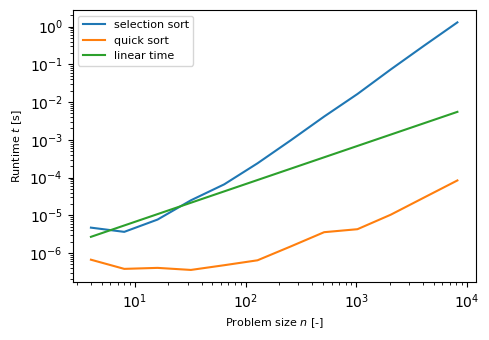

In [44]:
import time

# time.time() returns the current time in seconds
# The following structure can be used to measure the
# runtime of a given operation

# start = time.time()
# operation...
# runtime = time.time() - start

# Problem size
n =
# Runtime
t_ss = []
t_qs = []
# Number of runs per problem size
n_reps =

for size in n:
    # Initialize the original item array
    original = 
    # Start time
    
    # Sort using selection sort
    
    # Compute runtime
    

# Prepare the data for the plot function
data = 

# Plot measurements


## Homework

We saw that the performance of the quick sort algorithm depends on the choice of the pivot. More specifically, we saw that a pivot that cuts the array into equal upper and lower parts leads to the best-case scenario in terms of computational complexity of the algorithm. So why not make sure that the base-case scenario is reached? In fact, this is called **merge sort**.

Your task is to

- implement the merge-sort algorithm
- measure its average performance in terms of runtime, same as what we did for selection sort and quicksort above
- plot the performance of selection sort, quicksort and merge sort together

Answer the following questions:

- What is the computational complexity of the merge-sort algorithm in the base case, worse case and average scenarios?
- Is merge sort always faster than quicksort? If not, when is merge sort faster?

In [ ]:
# Code here

Copyright 2024 &copy; Manuel Saberi, High Performance Computing, Ruhr University Bochum. All rights reserved. No part of this notebook may be reproduced, distributed, or transmitted in any form or by any means, including photocopying, recording, or other electronic or mechanical methods, without the prior written permission of the publisher.